In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np 

from utils.visualization.visualize import plot_decision_boundary
from utils.data.helpers import list_to_model, rotate, get_moons_dataset

from utils.model.models import MLP

In [3]:
X, y = get_moons_dataset(n_samples=1000, noise=0.1)

data = pd.read_csv('../data/eight_angles.csv')
data.head()

,model_name,weight_0,weight_1,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,...,weight_142,weight_143,weight_144,weight_145,weight_146,weight_147,weight_148,weight_149,weight_150,angle
0,model_0_0.pth,2.254129,1.426895,1.754302,0.073831,-1.825361,0.556626,-0.167883,0.975716,1.722782,...,1.371318,-0.551456,-1.355835,1.214179,-0.135602,0.255294,1.410044,-0.047610,0.334383,0
1,model_0_1.pth,0.127768,0.205662,-0.489389,0.807447,-1.360715,0.695886,1.805677,0.494148,-1.034157,...,-1.083808,0.117529,-0.173624,-1.295525,1.579026,1.454135,-0.902253,-1.062293,1.097995,0
2,model_0_10.pth,-1.207956,0.396646,1.244529,0.529784,0.152492,0.281496,1.943397,0.136179,0.545595,...,-0.195425,-0.935945,1.220225,0.009605,1.587289,-1.336013,0.888823,-1.107967,0.186115,0
3,model_0_100.pth,-0.714779,0.539976,-2.381146,-0.839016,1.598412,-0.187950,0.939397,-0.179059,0.997448,...,-0.298362,0.209107,-0.280693,-1.094805,-0.466245,1.187672,1.097142,0.664430,-0.944944,0
4,model_0_1000.pth,-0.142664,-1.273238,-0.167711,1.360615,-1.245270,1.211818,-1.431565,-0.233748,-1.139913,...,1.232203,2.548929,-0.716404,1.194679,-0.857660,-0.818339,0.336050,-0.933447,-0.527385,0


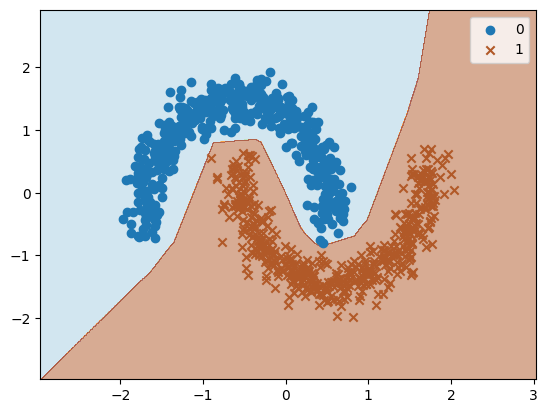

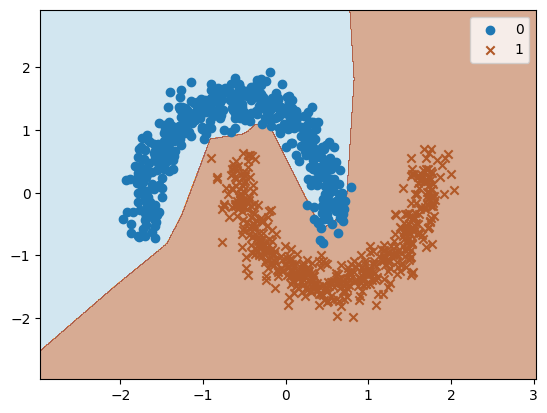

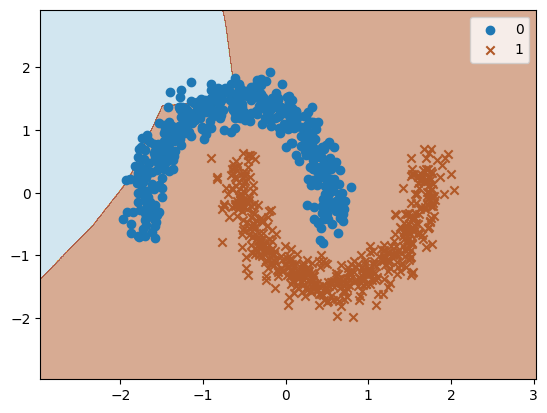

In [48]:
np.random.seed(0)

model = MLP(2, [10, 10], 1)
weights = data.iloc[0, 1:-1].values.tolist()
list_to_model(model, weights)
plot_decision_boundary(model, X, y)

a = np.zeros((30))
b = np.random.rand(110)/2
c = np.zeros((11))
noise = np.concatenate([a,b,c], axis=0)
weights = weights + noise
list_to_model(model, weights)
plot_decision_boundary(model, X, y)

a = np.random.rand(30)/2
b = np.zeros((110))
c = np.random.rand(11)/2
noise = np.concatenate([a,b,c], axis=0)
weights = weights + noise
list_to_model(model, weights)
plot_decision_boundary(model, X, y)

In [30]:
a = np.zeros((30))
b = np.random.rand(110)
c = np.zeros((11))
noise = np.concatenate([a,b,c], axis=0)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.41126794 0.81129941 0.951548   0.93566888 0.29498805 0.45307929
 0.30707341 0.15861537 0.72052608 0.82893177 0.96262008 0.31216079
 0.79257918 0.14509459 0.90361977 0.4283607  0.81848117 0.67807026
 0.0873188  0.70773954 0.35622455 0.95762978 0.90812975 0.86252557
 0.77340333 0.8276408  0.42491701 0.40555683 0.28323033 0.55058757
 0.46830042 0.89621239 0.46832463 0.84304515 0.29396983 0.24917488
 0.95679281 0.00745582 0.79112879 0.61495929 0.58517388 0.51505943
 0.96998068 0.57206415 0.34817771 0.00262358 0.68008611 0.4525644
 0.95234129 0.05265679 0.22812391 0.28822251 0.6202713  0.40787846
 0.96795549 0.23748237 0.26017304 0.0182974  0.1283355  0.77254004
 0.26020063 0.96455092 0.55273056 0.

In [15]:
data = pd.read_csv('../data/eight_angles.csv')
data.head()
y = data["angle"]
print(y.iloc[12222])

135


In [3]:
import torch

In [9]:
class ModelParamsDataset1(torch.utils.data.Dataset):
    def __init__(self, dataset_path, angle_change: int = 90):
        self.dataset_path = dataset_path
        self.dataset = pd.read_csv(dataset_path)
        self.angle_change = angle_change
        self.weights = self.dataset.drop(columns=["model_name", "angle"])
        self.angles = self.dataset["angle"]
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        weights = torch.tensor(self.weights.iloc[idx].astype('float32').values)
        angle = torch.tensor(self.angles.iloc[idx]/self.angle_change, dtype=torch.int64)

        return weights, angle
    
class ModelParamsDataset2(torch.utils.data.Dataset):
    def __init__(self, dataset_path, angle_change: int = 90):
        self.dataset_path = dataset_path
        self.dataset = pd.read_csv(dataset_path)
        self.angle_change = angle_change
        self.weights = self.dataset.drop(columns=["model_name", "angle"]).values
        self.angles = self.dataset["angle"].values
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        weights = torch.tensor(self.weights[idx])
        angle = torch.tensor(self.angles[idx]/self.angle_change, dtype=torch.int64)

        return weights, angle

In [13]:
data1 = ModelParamsDataset1('../data/eight_angles.csv')
data2 = ModelParamsDataset2('../data/eight_angles.csv')

dataloader_1 = torch.utils.data.DataLoader(data1, batch_size=32, shuffle=True)
dataloader_2 = torch.utils.data.DataLoader(data2, batch_size=32, shuffle=True)

In [14]:
%%time
for X, y in dataloader_1:
    pass

CPU times: total: 9.39 s
Wall time: 9.29 s


In [16]:
%%time
for X, y in dataloader_2:
    pass

CPU times: total: 1.41 s
Wall time: 940 ms
